# Task 1

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('openpowerlifting.csv')
upd_columns = ['Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
               'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
               'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Country',
               'Federation', 'MeetCountry']
df = df[upd_columns]
df = df.dropna()
df = df[(df['Squat1Kg']>0) & (df['Squat2Kg']>0) & (df['Squat3Kg']>0) & (df['Bench1Kg']>0) & (df['Bench2Kg']>0) & (df['Bench3Kg']>0) & (df['Deadlift1Kg']>0) & (df['Deadlift2Kg']>0) & (df['Deadlift3Kg']>0)]
columns_to_encode = ['Sex', 'Equipment', 'Division', 'Country', 'Federation', 'MeetCountry', 'Place']
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

columns_to_normalize = ['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
                        'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
                        'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

features = ['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
            'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
            'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg']

# Features (X) and target (y) variables
X = df[features]
y = df['Sex']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_166189/975422994.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting.csv')


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


2023-11-01 10:48:49.170074: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:48:49.803262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 10:48:49.803289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 10:48:49.807011: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 10:48:50.170539: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:48:50.173484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [5]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2023-11-01 10:49:05.020120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 10:49:05.471732: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/50
625/625 [==============================] - 1s 1ms/step - loss: 0.4105 - accuracy: 0.7894 - val_loss: 0.2985 - val_accuracy: 0.8764
Epoch 2/50
625/625 [==============================] - 1s 1ms/step - loss: 0.2954 - accuracy: 0.8815 - val_loss: 0.2599 - val_accuracy: 0.8930
Epoch 3/50
625/625 [==============================] - 1s 1ms/step - loss: 0.2780 - accuracy: 0.8898 - val_loss: 0.2567 - val_accuracy: 0.8930
Epoch 4/50
625/625 [==============================] - 1s 978us/step - loss: 0.2708 - accuracy: 0.8903 - val_loss: 0.2462 - val_accuracy: 0.8969
Epoch 5/50
625/625 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.8909 - val_loss: 0.2469 - val_accuracy: 0.8994
Epoch 6/50
625/625 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.8943 - val_loss: 0.2365 - val_accuracy: 0.8981
Epoch 7/50
625/625 [==============================] - 1s 1ms/step - loss: 0.2540 - accuracy: 0.8977 - val_loss: 0.2425 - val_accuracy: 0.8988
Epoc

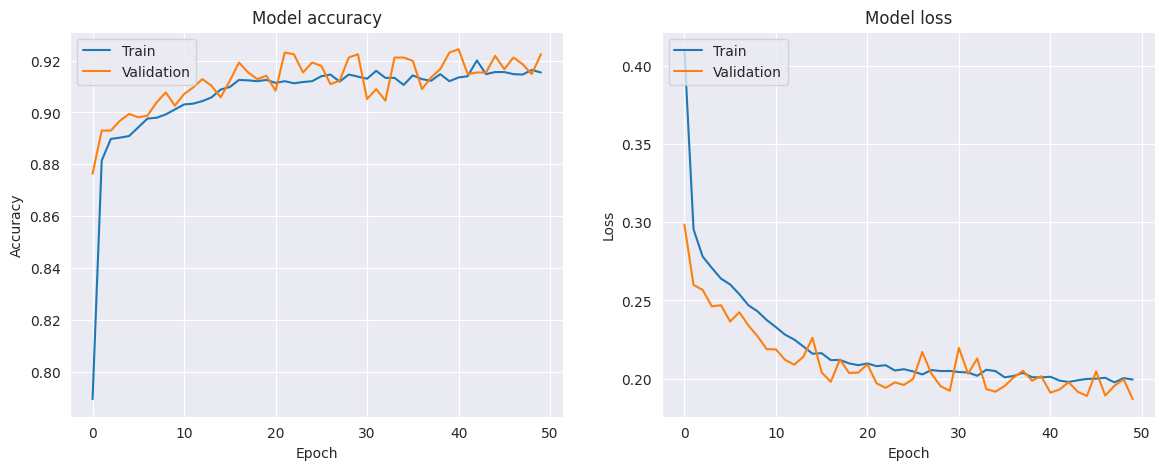

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


61/61 [==============================] - 0s 682us/step


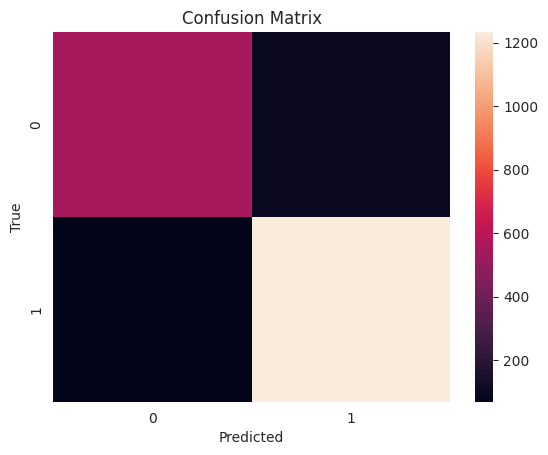

In [9]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Task 2 

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image

# Load the labels
labels_df = pd.read_csv('level_02/train_data_labels.csv', header=None)

# The CSV file's rows correspond to the images in the folder
labels = labels_df.values.flatten()

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels, num_classes=6)  # Assuming we have 6 classes

# Prepare the image data
train_images = []
image_folder = 'level_02/train_data'
image_files = [f for f in os.listdir(image_folder) if not f.startswith('.')]  # Exclude hidden/system files

# Verify that we have the same number of images and labels
if len(image_files) != len(labels):
    raise ValueError(f"Mismatch in number of images and labels: Found {len(image_files)} images and {len(labels)} labels.")

for file in image_files:
    img_path = os.path.join(image_folder, file)
    img = Image.open(img_path)
    img = img.resize((200, 200))
    img = np.array(img)
    train_images.append(img)

train_images = np.array(train_images)

# Sanity check
assert train_images.shape[0] == labels.shape[0], "The number of images must match the number of labels."

# Initialize the ImageDataGenerator (with or without augmentation)
train_datagen = ImageDataGenerator(rescale=1./255)

# Create the actual data generator for Keras
train_generator = train_datagen.flow(train_images, labels, batch_size=32)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 because we have 6 classes (0 to 5 animals)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
# Train the model (consider using a smaller number of epochs if it takes too long)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,  # Number of batches per epoch
    epochs=10,
    verbose=1
)


Epoch 1/10
15/15 [==============================] - 10s 603ms/step - loss: 2.5306 - accuracy: 0.1603
Epoch 2/10
15/15 [==============================] - 7s 490ms/step - loss: 1.7905 - accuracy: 0.2051
Epoch 3/10
15/15 [==============================] - 7s 482ms/step - loss: 1.7889 - accuracy: 0.2415
Epoch 4/10
15/15 [==============================] - 7s 481ms/step - loss: 1.7647 - accuracy: 0.2543
Epoch 5/10
15/15 [==============================] - 7s 488ms/step - loss: 1.6508 - accuracy: 0.3226
Epoch 6/10
15/15 [==============================] - 8s 517ms/step - loss: 1.4316 - accuracy: 0.4188
Epoch 7/10
15/15 [==============================] - 7s 478ms/step - loss: 1.1595 - accuracy: 0.5513
Epoch 8/10
15/15 [==============================] - 8s 511ms/step - loss: 0.9968 - accuracy: 0.6218
Epoch 9/10
15/15 [==============================] - 7s 479ms/step - loss: 0.7837 - accuracy: 0.7051
Epoch 10/10
15/15 [==============================] - 7s 471ms/step - loss: 0.7538 - accuracy: 0.722

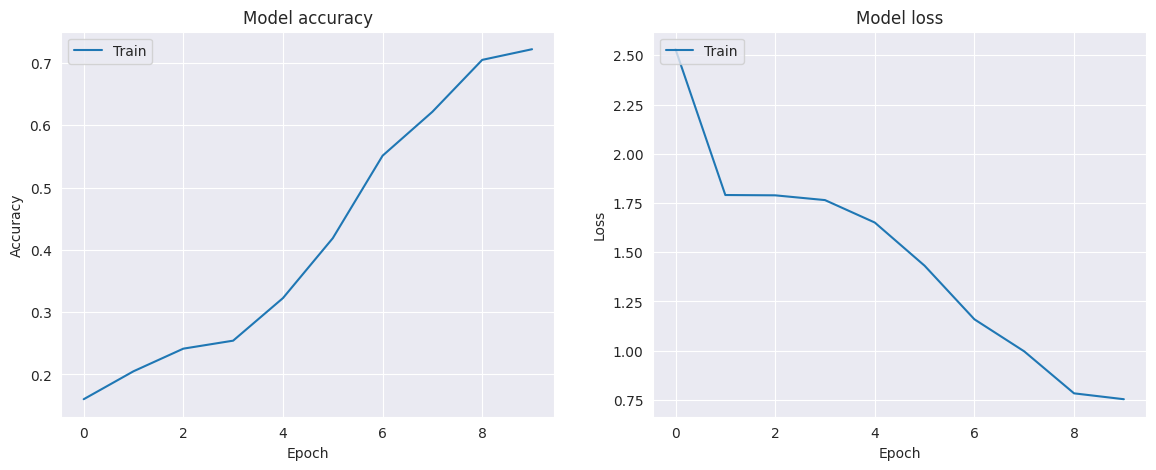

In [16]:
# Plot training accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()


1/1 [==============================] - 0s 62ms/step


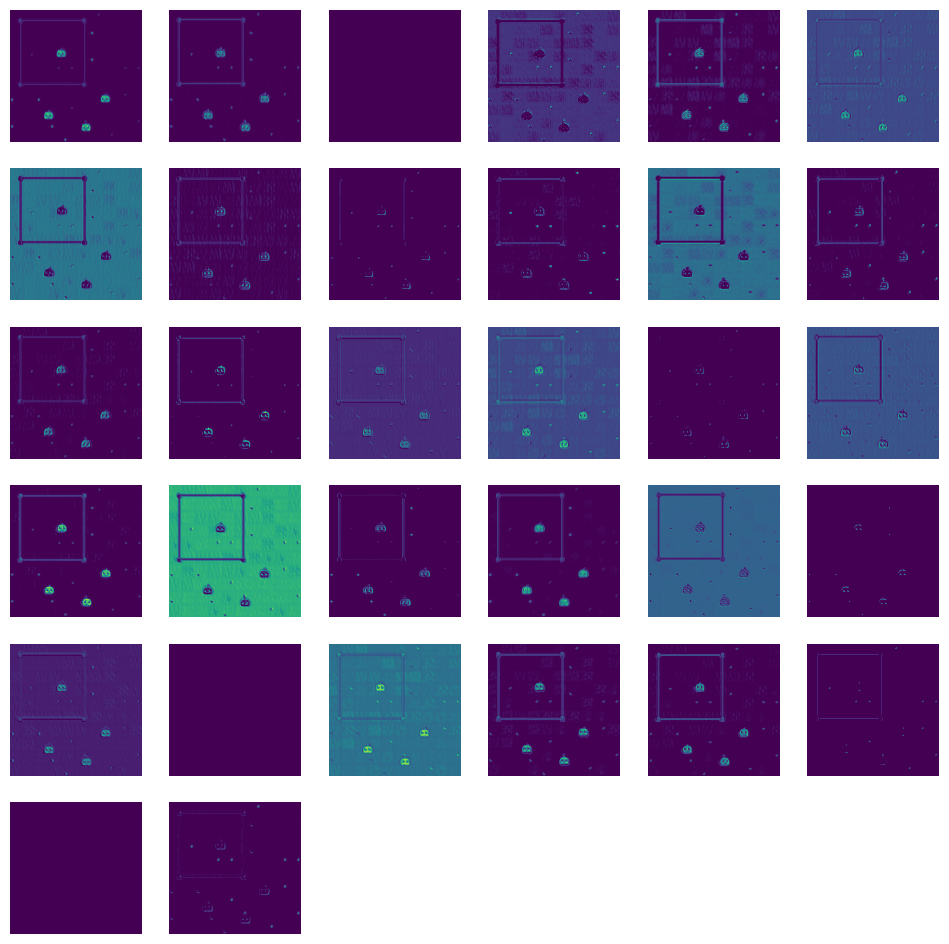

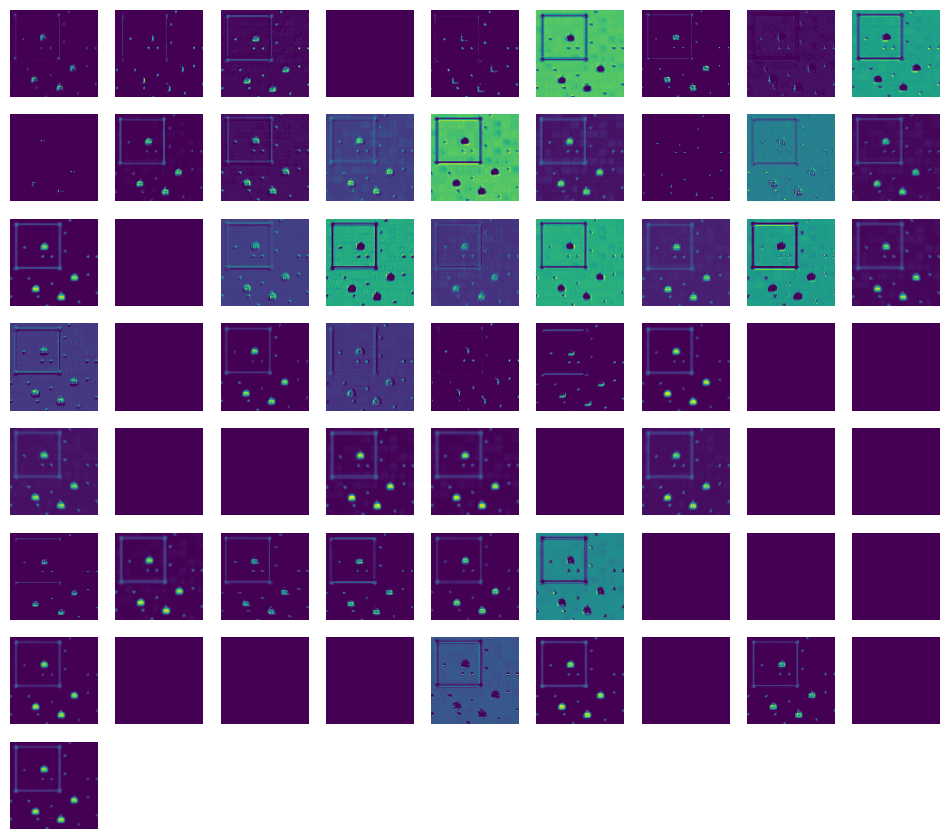

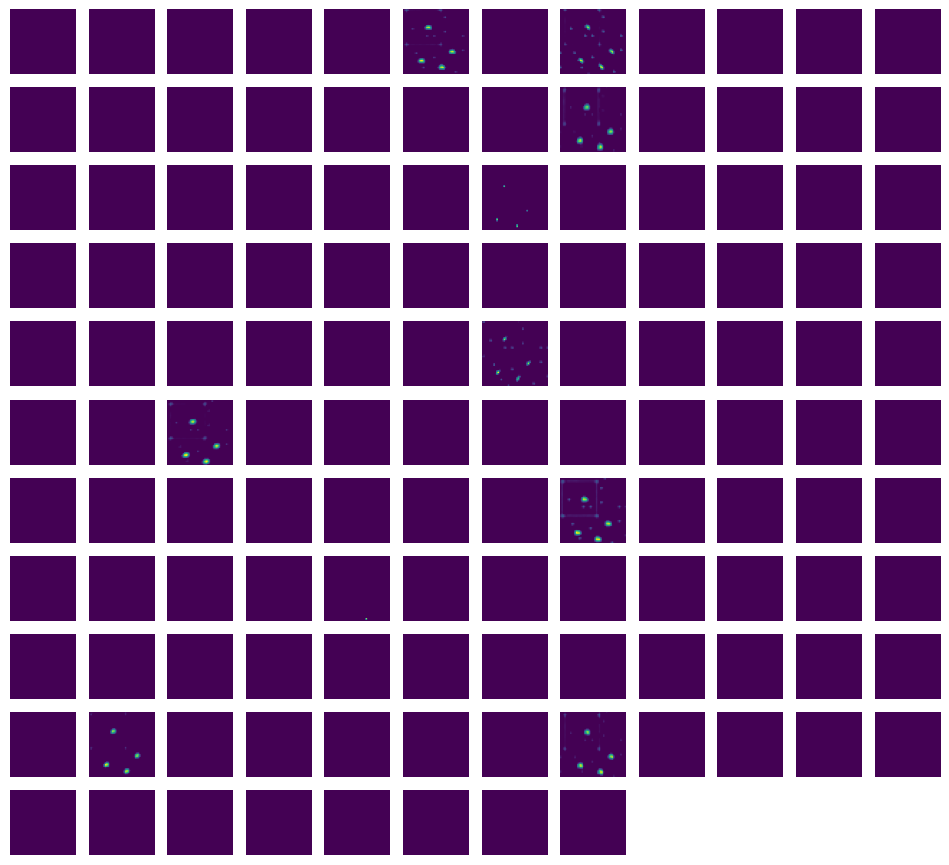

In [22]:
from tensorflow.keras.models import Model
import math

layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_images[:1])

# Display the feature maps
for layer_activations in activations:
    num_feature_maps = layer_activations.shape[-1]
    size = int(math.sqrt(num_feature_maps)) + 1  # Find the next square that can fit all the feature maps

    plt.figure(figsize=(12, 12))
    for i in range(num_feature_maps):
        plt.subplot(size, size, i + 1)
        plt.imshow(layer_activations[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()



# Task 3

In [23]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')
true['category'] = 1
fake['category'] = 0
df = pd.concat([true, fake])
df = df.sample(frac = 0.3)
df['text'] = df['title'] + " " + df['text']
df =  df.drop(['title', 'date', 'subject'], axis =1,  inplace = False)
df.drop_duplicates(inplace = True)
df

,text,category
14535,WATCH: MUSLIM WOMAN ADMITS OBAMA CAME TO MOSQU...,0
8804,"Oregon Judge Sticks It To Ammon Bundy, Plans ...",0
5475,A Whopping 0% Of Black Voters In Ohio And Pen...,0
13706,TRUMP IS RIGHT AGAIN! While Pundits and Politi...,0
7853,This Church Treasurer Is Going To Jail For A ...,0
...,...,...
454,Ex-DOJ Lawyer Just Dropped The Most Depressin...,0
6495,Watch Dan Savage Destroy Ann Coulter For Her ...,0
9140,PELOSI CHUCKLES AND MOCKS President Trump when...,0
14554,TOP NAVY COMMANDER RELEASED After Reportedly R...,0


In [24]:
def cleaning(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub('\[[^]]*\]', '', text) #Remove between square brackets text
    text =  re.sub(r'http\S+', '', text) # Removing URL's
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation marks
    text = nltk.word_tokenize(text)  # Break the text into tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stop-words
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]  # lemmatization of the text
    text = " ".join(text)  # Connect the tokens in a line
    return text

In [29]:
from time import time
import re 
import string 
import nltk

t = time()
df['text'] = df['text'].apply(lambda x: cleaning(x))
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.39 mins


In [30]:
df

,text,category
14535,watch muslim woman admits obama came mosque ge...,0
8804,oregon judge stick ammon bundy plan charge day...,0
5475,whopping black voter ohio pennsylvania support...,0
13706,trump right pundit politician dodge truth trum...,0
7853,church treasurer going jail crime spree blow l...,0
...,...,...
454,exdoj lawyer dropped depressing truth bomb tru...,0
6495,watch dan savage destroy ann coulter ‘ bullsht...,0
9140,pelosi chuckle mock president trump asked rela...,0
14554,top navy commander released reportedly reveali...,0


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Parameters
vocab_size = 10000  # This is a parameter to set based on your vocabulary size
max_length = 200  # This is a parameter to set based on the length distribution of your texts
embedding_dim = 128
batch_size = 32
num_epochs = 5

# Tokenize text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences
X = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numerical format
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(df['category'])
y = to_categorical(numeric_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test set accuracy: {accuracy * 100:.2f}%')

# Predict the categories of the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the class labels as a list of strings
class_labels = [str(cls) for cls in label_encoder.classes_]

# Then pass this list to the classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))





Epoch 1/5
259/259 [==============================] - 25s 88ms/step - loss: 0.1580 - accuracy: 0.9459 - val_loss: 0.0902 - val_accuracy: 0.9748
Epoch 2/5
259/259 [==============================] - 24s 91ms/step - loss: 0.0407 - accuracy: 0.9902 - val_loss: 0.0756 - val_accuracy: 0.9753
Epoch 3/5
259/259 [==============================] - 24s 92ms/step - loss: 0.0126 - accuracy: 0.9970 - val_loss: 0.0997 - val_accuracy: 0.9719
Epoch 4/5
259/259 [==============================] - 24s 91ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0985 - val_accuracy: 0.9763
Epoch 5/5
81/81 [==============================] - 1s 13ms/step - loss: 0.1062 - accuracy: 0.9745
Test set accuracy: 97.45%
81/81 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1290
           1       0.98      0.97      0.97      1294

    accuracy                           0.97      2584
   macro avg       0.97      0.9

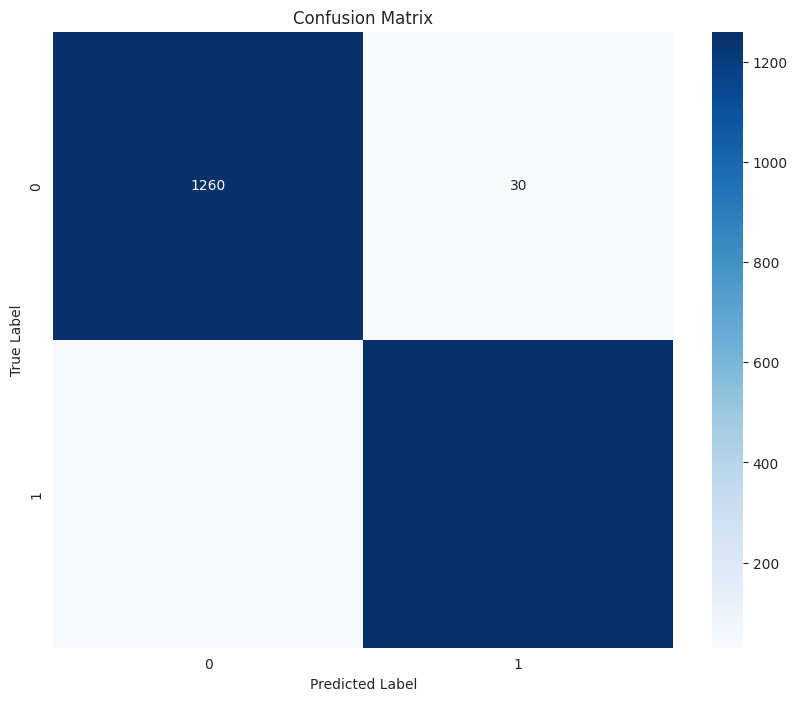

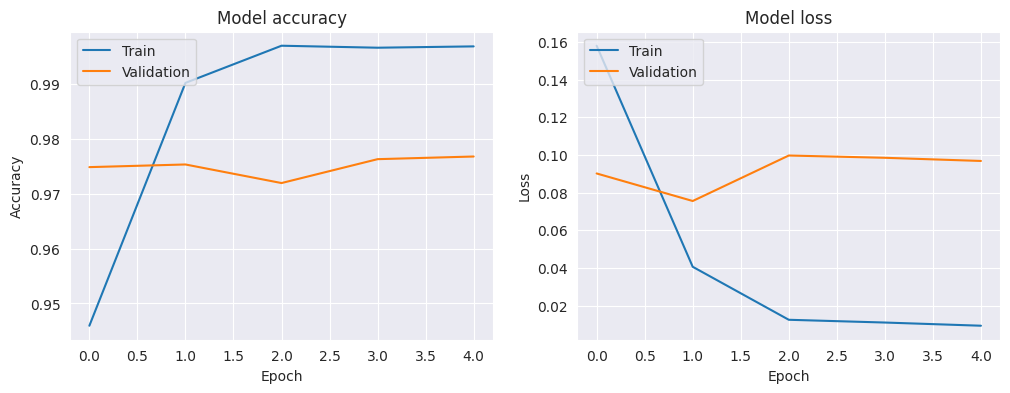

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()